In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftshift
import sounddevice as sd
import wavio

In [2]:
def generateSin(freq, time, fs):
    n = time*fs #numero de pontos
    x = np.linspace(0.0, time, n)  # eixo do tempo
    s = np.sin(freq*x*2*np.pi)
    return (x, s)

In [3]:
def calcFFT(signal, fs):
    # https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html
    #y  = np.append(signal, np.zeros(len(signal)*fs))
    N  = len(signal)
    T  = 1/fs
    xf = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N)
    yf = fft(signal)
    return(xf, fftshift(yf))

In [4]:
fs  = 44100
T   = 1     
t   = np.linspace(-T/2,T/2,T*fs)
tecla = input('Qual tecla você deseja? ')

Qual tecla você deseja? 8


In [5]:
freq = {}
freq['1'] = [697,1209]
freq['2'] = [697,1336]
freq['3'] = [697,1477]
freq['A'] = [697,1633]
freq['4'] = [770,1209]
freq['5'] = [770,1336]
freq['6'] = [770,1477]
freq['B'] = [770,1633]
freq['7'] = [852,1209]
freq['8'] = [852,1336]
freq['9'] = [852,1477]
freq['C'] = [852,1633]
freq['X'] = [941,1209]
freq['0'] = [941,1336]
freq['#'] = [941,1477]
freq['D'] = [941,1633]

(-0.015, 0.015)

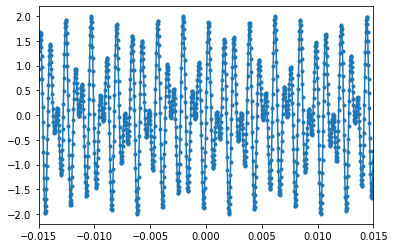

In [6]:
x0, y0 = generateSin(freq[tecla][0],T,fs)
x1, y1 = generateSin(freq[tecla][1],T,fs)

y = y0+y1

plt.figure()
plt.plot(t, y, '.-')
plt.xlim(-0.015,0.015)

(-1500.0, 2000.0)

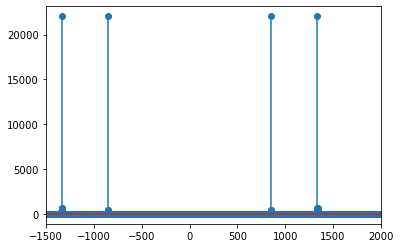

In [7]:
X, Y = calcFFT(y,fs)
plt.figure()
plt.stem(X,np.abs(Y), use_line_collection = True)
plt.xlim(-1500,2000)

In [8]:
sd.play(y, fs)
wavio.write("sound.wav", y, fs, sampwidth=2)